# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [39]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [44]:
df = pd.read_csv('zillow_data.csv')

In [330]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,...,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,...,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,806100.0,810900.0,817400.0,826800.0,837900.0,848100.0,853800.0,856700.0,856600.0,854400.0,853000.0,856200.0,859700.0,863900.0,872900.0,883300.0,889500.0,892800,893600,891300,889900,891500,893000,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,193400.0,193100.0,192700.0,193000.0,193700.0,194800.0,196100.0,197800.0,199700.0,201900.0,204500.0,207800.0,211500.0,214900.0,217800.0,221100.0,224100.0,226700.0,228200.0,228500.0,227200.0,224900.0,221900.0,219100.0,216900.0,215400.0,214500.0,214600.0,215600.0,217000.0,218400.0,219600.0,220000.0,219100.0,216800.0,213100.0,208700.0,204000.0,199600.0,...,199200.0,199400.0,199500.0,199600.0,200100.0,200700.0,201800.0,202700.0,203000.0,203000.0,203000.0,203100.0,203500.0,204600.0,205600.0,205900.0,206900.0,208500.0,209800.0,211300.0,214000.0,217200.0,220600.0,223800.0,226500.0,228600.0,230400.0,231800.0,233000.0,234200.0,235400.0,236600.0,238500.0,240500,242600,244700,246300,247600,249600,251400,253000,255200,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,2

In [331]:
len(df)

14723

In [361]:
df.Metro.value_counts().index[0:10]

Index(['New York', 'Los Angeles-Long Beach-Anaheim', 'Chicago', 'Philadelphia',
       'Washington', 'Boston', 'Dallas-Fort Worth', 'Minneapolis-St Paul',
       'Houston', 'Pittsburgh'],
      dtype='object')

In [332]:
#
# Get some data by Metro area
#
chicago_df = df[df['Metro'] == 'Chicago']

In [346]:
#
# NY Data!
#
ny_metro_df = df[df['Metro'] == 'New York']

In [362]:
la_df = df[df['Metro'] == 'Los Angeles-Long Beach-Anaheim']
la_melt = melt_data(la_df)

In [364]:
phil_df = df[df['Metro'] == 'Philadelphia']
phil_melt = melt_data(phil_df)


In [354]:
las_vegas_df = df[df['Metro'] == 'Las Vegas']

In [355]:
las_vegas_melt = melt_data(las_vegas_df)

In [367]:
wash_df = df[df['Metro'] == 'Washington']
wash_melt = melt_data(wash_df)

In [419]:
boston_df = df[df['Metro'] == 'Boston']
boston_melt = melt_data(boston_df)

In [348]:
len(ny_metro_df)

779

In [349]:
ny_melt = melt_data(ny_metro_df)

In [350]:
len(ny_melt)

265

In [333]:
len(chicago_df)

325

In [334]:
chi_melt = melt_data(chicago_df)

In [404]:
la_melt.head()

,value
time,
1996-04-01,226259.011628
1996-05-01,226251.744186
1996-06-01,226225.872093
1996-07-01,226197.674419
1996-08-01,226229.941860


In [336]:
len(chi_melt)

265

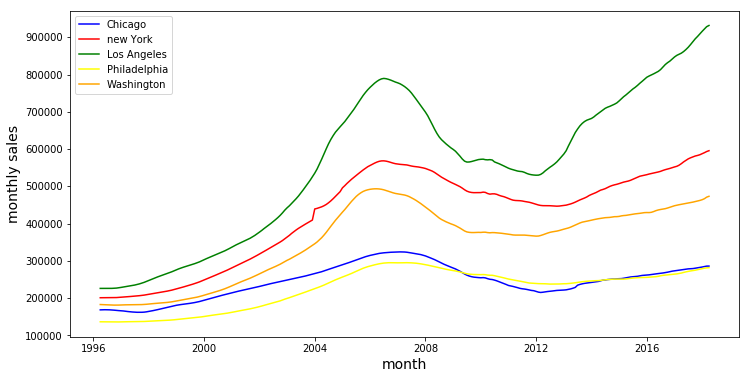

In [368]:
fig = plt.figure(figsize=(12,6))
plt.plot(chi_melt, color="blue", label='Chicago')
plt.plot(ny_melt, color="red", label='new York')
plt.plot(la_melt, color="green", label='Los Angeles')
plt.plot(phil_melt, color="yellow", label='Philadelphia')
plt.plot(wash_melt, color="orange", label='Washington')
plt.xlabel("month", fontsize=14)
plt.ylabel("monthly sales", fontsize=14)
plt.legend(loc='best')
plt.show()

In [373]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['value']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

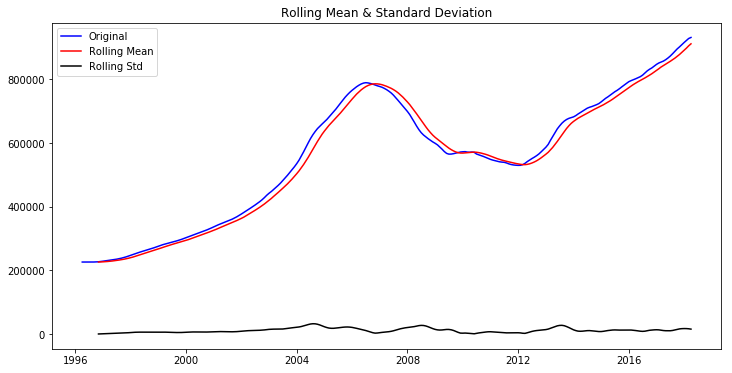

Results of Dickey-Fuller Test:
Test Statistic                  -1.916641
p-value                          0.324274
#Lags Used                       8.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


In [377]:
stationarity_check(la_melt)

In [ ]:
rolmean = la_melt.rolling(window = 4).mean()

In [380]:
def transform(ts):
    ts_log = np.log(ts)
    ts_logmean = np.log(ts).rolling(window=7).mean()
    ts_sqrt= np.sqrt(ts)
        
    fig = plt.figure(figsize=(12,6))
    plt.xlabel("month - no transform", fontsize=14)
    plt.ylabel("monthly sales", fontsize=14)
    plt.plot(ts,  color='blue');
    plt.show()
    
    fig = plt.figure(figsize=(12,6))
    plt.plot(ts_log, color='red');
    plt.xlabel("month - log", fontsize=14)
    plt.ylabel("monthly sales", fontsize=14)        
    plt.show()
    
    fig = plt.figure(figsize=(12,6))
    plt.xlabel("month - sqrt", fontsize=14)
    plt.ylabel("monthly sales", fontsize=14)        
    plt.plot(ts_sqrt, color='yellow');
    plt.show()
    
    fig = plt.figure(figsize=(12,6))
    plt.xlabel("month - log mean", fontsize=14)
    plt.ylabel("monthly sales", fontsize=14)        
    plt.plot(ts_logmean, color='green');
    plt.show()

In [401]:
def log_diff_ewm(ts):
    ts_log = np.log(ts)
    exp_rolmean = np.log(ts).ewm(halflife = 4).mean()

    return ts_log - exp_rolmean

In [413]:
def plot_ewm_diff(ts):
    # get log diff ewm first
    ts_log = np.log(ts)
    exp_rolmean = np.log(ts).ewm(halflife = 4).mean()
    log_diff_ewm = ts_log - exp_rolmean
    
    # difference it
    diff = log_diff_ewm.diff(periods=1)
    diff.dropna(inplace=True)
    
    # check and plot
    stationarity_check(diff)    

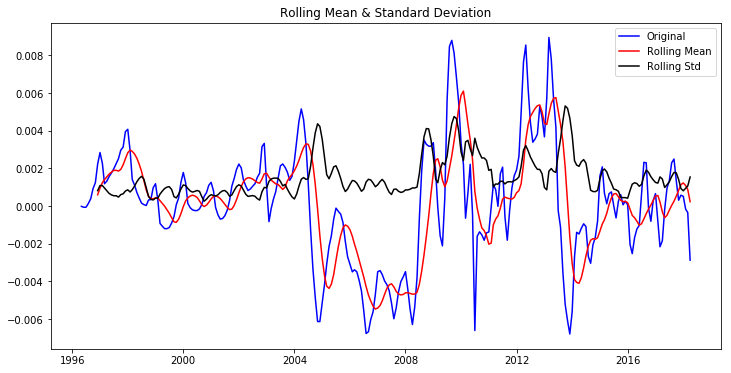

Results of Dickey-Fuller Test:
Test Statistic                  -2.984607
p-value                          0.036357
#Lags Used                       7.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


In [414]:
plot_ewm_diff(la_melt)

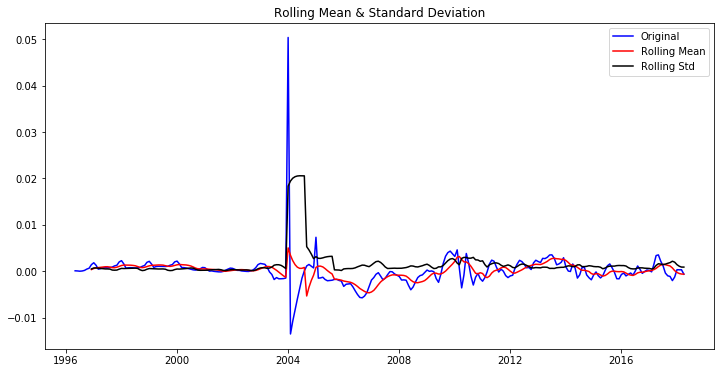

Results of Dickey-Fuller Test:
Test Statistic                -1.523769e+01
p-value                        5.214996e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.630000e+02
Critical Value (1%)           -3.455461e+00
Critical Value (5%)           -2.872593e+00
Critical Value (10%)          -2.572660e+00
dtype: float64


In [415]:
plot_ewm_diff(ny_melt)

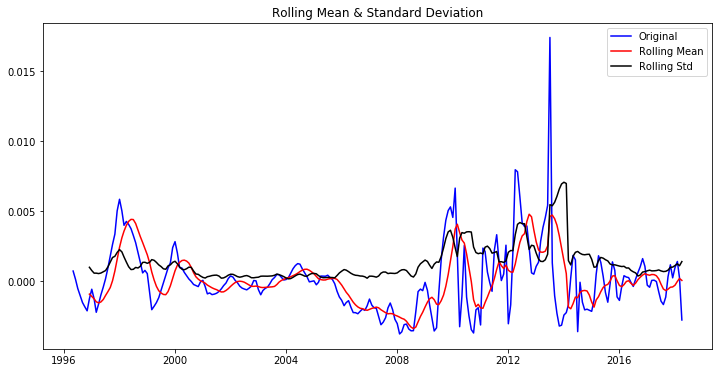

Results of Dickey-Fuller Test:
Test Statistic                -6.277273e+00
p-value                        3.872984e-08
#Lags Used                     0.000000e+00
Number of Observations Used    2.630000e+02
Critical Value (1%)           -3.455461e+00
Critical Value (5%)           -2.872593e+00
Critical Value (10%)          -2.572660e+00
dtype: float64


In [416]:
plot_ewm_diff(chi_melt)

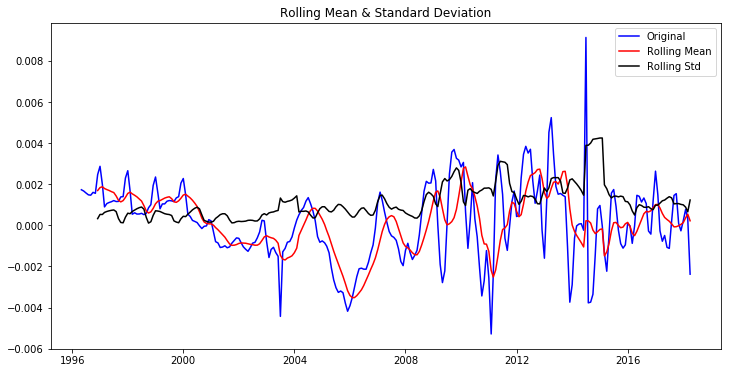

Results of Dickey-Fuller Test:
Test Statistic                  -4.755423
p-value                          0.000066
#Lags Used                       3.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64


In [420]:
plot_ewm_diff(boston_melt)

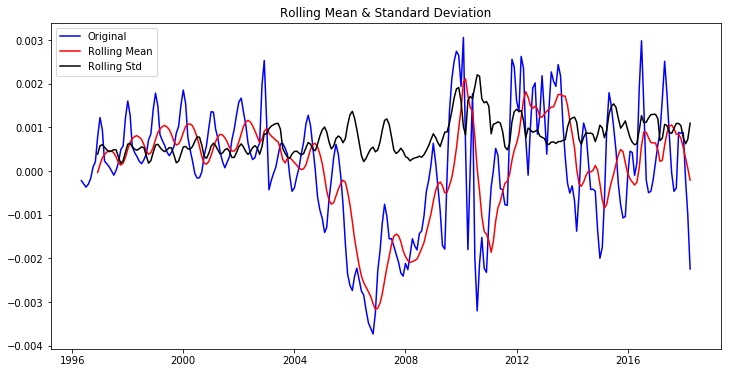

Results of Dickey-Fuller Test:
Test Statistic                  -2.238013
p-value                          0.192739
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [417]:
plot_ewm_diff(phil_melt)

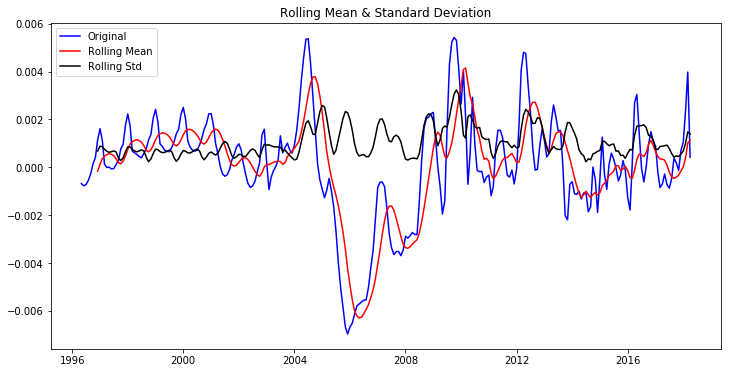

Results of Dickey-Fuller Test:
Test Statistic                  -3.109897
p-value                          0.025829
#Lags Used                      10.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [418]:
plot_ewm_diff(wash_melt)

In [402]:
la_log_diff_ewm = log_diff_ewm(la_melt)

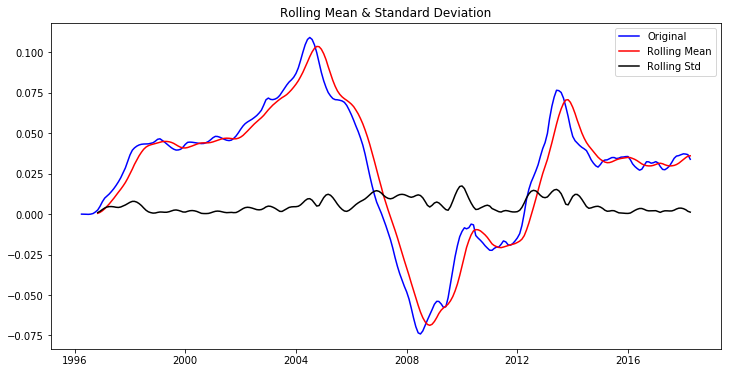

Results of Dickey-Fuller Test:
Test Statistic                  -2.644574
p-value                          0.084130
#Lags Used                       8.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


In [403]:
stationarity_check(la_log_diff_ewm)

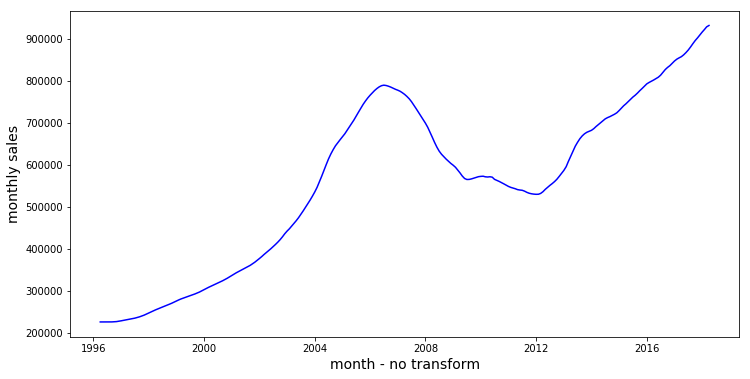

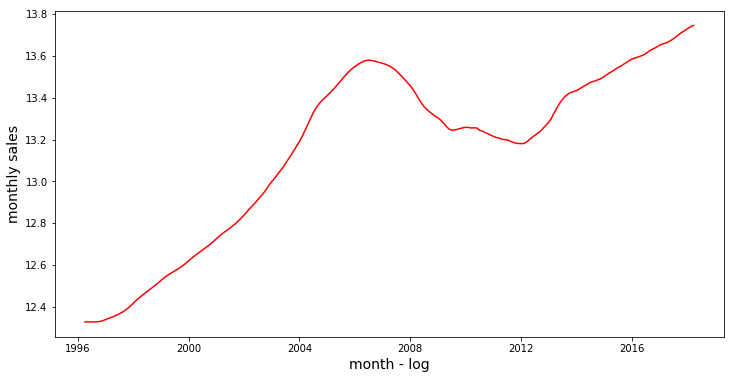

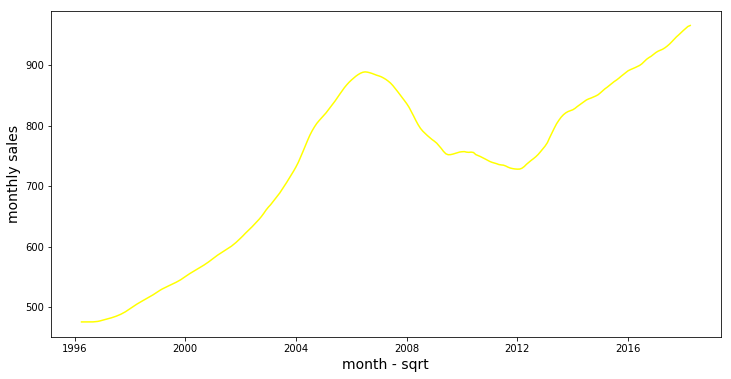

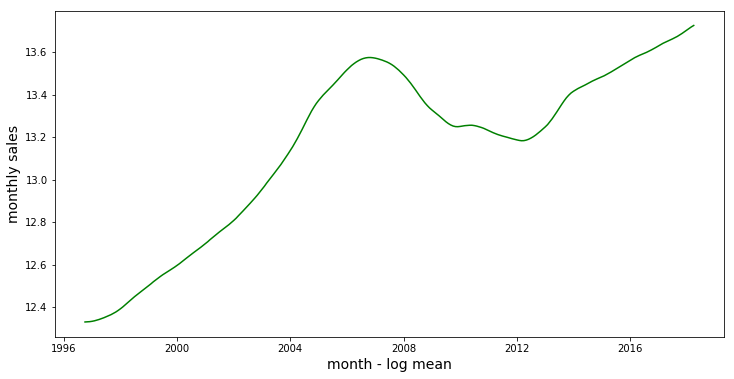

In [381]:
transform(la_melt)

In [384]:
def difference(ts):
    ts_log = np.log(ts)
    ts_logmean = np.log(ts).rolling(window=7).mean()

    diff = ts_log - ts_logmean

    diff.dropna(inplace=True)

    fig = plt.figure(figsize=(12,6))
    plt.xlabel("month - differenced", fontsize=14)
    plt.ylabel("monthly sales", fontsize=14)
    plt.plot(diff,  color='blue');
    plt.show()
    
    return diff

In [395]:
def ewm(ts):
    exp_rolmean = np.log(ts).ewm(halflife = 4).mean()

    # Plot the original data with exp weighted average
    fig = plt.figure(figsize=(12,7))
    orig = plt.plot(np.log(ts), color='blue',label='Original')
    mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    return exp_rolmean


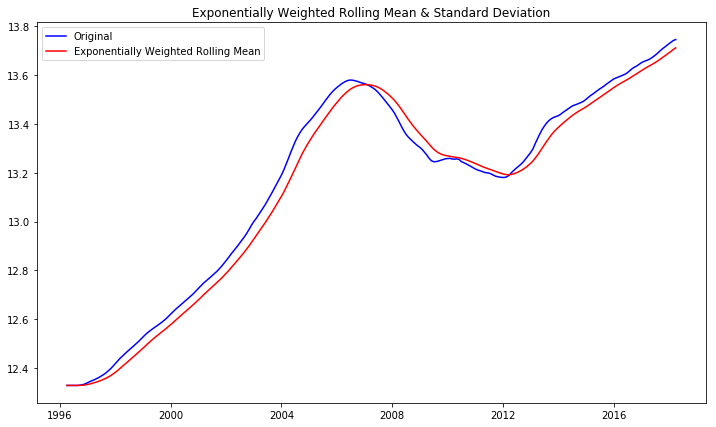

In [397]:
la_ewm = ewm(la_melt)

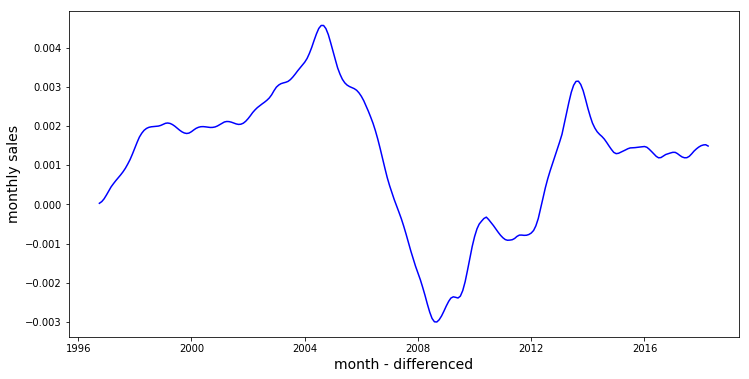

In [398]:
la_diff = difference(la_ewm)

function

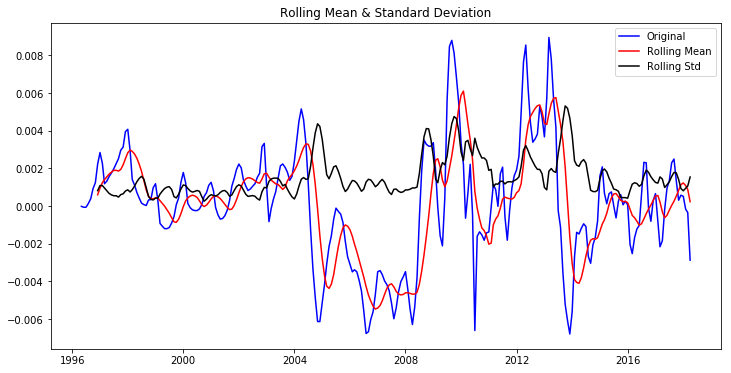

Results of Dickey-Fuller Test:
Test Statistic                  -2.984607
p-value                          0.036357
#Lags Used                       7.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


In [411]:
#la_diff2 = la_melt.diff(periods=1)
la_diff2 = la_log_diff_ewm.diff(periods=1)
la_diff2.dropna(inplace=True)
stationarity_check(la_diff2)

In [114]:
#
# Data Cleaning:
# Change RegionName (ZIP) to strings
#
df.RegionName = df.RegionName.astype(str)

In [ ]:
#
# Data Cleaning (EDA):
# Find where we have ZIPs less than 5 numbers (1403)
#
len(df[df['RegionName'].str.len()==4])

In [126]:
#
# Data Cleaning (EDA):
# Find where we have ZIPs less than 4 numbers (none)
#
len(df[df['RegionName'].str.len()==3])

0

In [124]:
#
# Data Cleaning:
# Prepend 0 to all ZIPs that are less than 5 nums, e.g., 1001 --> 01001
#
df['RegionName'] = np.where(df.RegionName.str.len()<5, '0'+df.RegionName, df.RegionName)

In [127]:
#
# Data Cleaning (EDA):
# Confirm that we cleaned all those ZIPs
#
len(df[df['RegionName'].str.len()==4])

0

In [ ]:
#
# Data Cleaning and EDA:
# Check uniqueness of ZIPs
#
df[df['RegionName'].duplicated()==True]
#
# And each ZIP has 265 columns of calendar sales
df[df['RegionName']==79936]

In [103]:
len(df)

14723

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,...,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,79700.0,79900.0,80100.0,80300.0,80600.0,80900.0,81200.0,81400.0,81700.0,82100.0,82400.0,82600.0,82800.0,82900.0,83000.0,83000.0,82900.0,82800.0,82700.0,82400.0,82100.0,81900.0,81600.0,81300.0,81000.0,80800.0,80600.0,80300.0,80000.0,79800.0,79500.0,79200.0,78900.0,78600.0,78400.0,78200.0,78200.0,78200.0,78300.0,...,113500.0,112800.0,112700.0,112400.0,112200.0,112400.0,112800.0,113200.0,113400.0,113100.0,112800.0,112900.0,112900.0,112800.0,112700.0,113000.0,113300.0,113600.0,113500.0,113300.0,113000.0,113000.0,112900.0,112800.0,112500.0,112400.0,112000.0,111500.0,111400.0,112000.0,112500.0,112700.0,113100.0,113900,114400,114500,114400,114300,114400,114700,115000,115000,115200,115600,115900,115600,115400,115400,115500,115800,116300,116200,115600,115000,114500,114200,114000,114000,113900,114100,114900,115700,116300,116900,117300,117600,118000,118600,118900,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,...,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04


# Step 2: Data Preprocessing

In [17]:
# def get_datetimes(df):
#     return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

# Step 3: Reshape from Wide to Long Format

In [325]:
#
# 
#
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [142]:
#
# Manual Melt
#
melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
melted = melted.dropna(subset=['value'])

In [143]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744704 entries, 0 to 3901594
Data columns (total 9 columns):
RegionID      int64
RegionName    object
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
time          datetime64[ns]
value         float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 285.7+ MB


In [130]:
melted.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


In [134]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744704 entries, 0 to 3901594
Data columns (total 9 columns):
RegionID      int64
RegionName    int64
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
time          datetime64[ns]
value         float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 445.7+ MB


In [ ]:
#
# SOME STATS:
# 14,723 ZIP codes
# 7,554 Cities
# 701 Metro Areas
# 1,212 Counties
# 51 States
# 

In [303]:
len(melted.groupby('State').count())

51

In [300]:
#melted.CountyName.aggregate()

In [144]:
#
# Data Cleaning:
# Set RegionName (ZIP) and time as indices
#
melted.set_index(['RegionName', 'time'], inplace=True)

In [145]:
melted.sort_values(['RegionName', 'time'], inplace=True)

In [162]:
melted.head()

RegionID    City State        Metro CountyName  SizeRank     value
RegionName time                                                                          
01001      1996-04-01     58196  Agawam    MA  Springfield    Hampden      5851  113100.0
           1996-05-01     58196  Agawam    MA  Springfield    Hampden      5851  112800.0
           1996-06-01     58196  Agawam    MA  Springfield    Hampden      5851  112600.0
           1996-07-01     58196  Agawam    MA  Springfield    Hampden      5851  112300.0
           1996-08-01     58196  Agawam    MA  Springfield    Hampden      5851  112100.0

In [168]:
melted[melted.index=='01001']

,,RegionID,City,State,Metro,CountyName,SizeRank,value
RegionName,time,,,,,,,


In [174]:
melted.index.names[0]

'RegionName'

In [178]:
m1 = melted.reset_index()

In [177]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3744704 entries, (01001, 1996-04-01 00:00:00) to (99901, 2018-04-01 00:00:00)
Data columns (total 7 columns):
RegionID      int64
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
value         float64
dtypes: float64(1), int64(2), object(4)
memory usage: 215.0+ MB


In [312]:
NY = m1[m1['State'] == 'NY']

In [313]:
len(NY)

265015

In [260]:
agawam = m1[m1['RegionName']=='01001'].copy()

In [261]:
agawam.set_index('time', inplace=True)

In [262]:
agawam.head()

,RegionName,RegionID,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,01001,58196,Agawam,MA,Springfield,Hampden,5851,113100.0
1996-05-01,01001,58196,Agawam,MA,Springfield,Hampden,5851,112800.0
1996-06-01,01001,58196,Agawam,MA,Springfield,Hampden,5851,112600.0
1996-07-01,01001,58196,Agawam,MA,Springfield,Hampden,5851,112300.0
1996-08-01,01001,58196,Agawam,MA,Springfield,Hampden,5851,112100.0


In [263]:
agawam.drop(axis=1, columns=['RegionName', 'RegionID', 'City','State', 'Metro', 'CountyName', 'SizeRank'], inplace=True)

In [264]:
len(agawam)

265

In [265]:
len(agawam.value)

265

In [246]:
log_vals = np.array(np.log(agawam.value))

In [247]:
sq_vals = np.array(np.sqrt(agawam.value))

In [245]:
ag_log_vals = np.sqrt(agawam.values)

In [216]:
ag_time_index = agawam.index

In [242]:
months = pd.date_range('1996-04', periods=265, freq="M")
index = pd.DatetimeIndex(months)


In [248]:
data = pd.Series(sq_vals, index=index)

In [190]:
import matplotlib.pylab as plt
%matplotlib inline

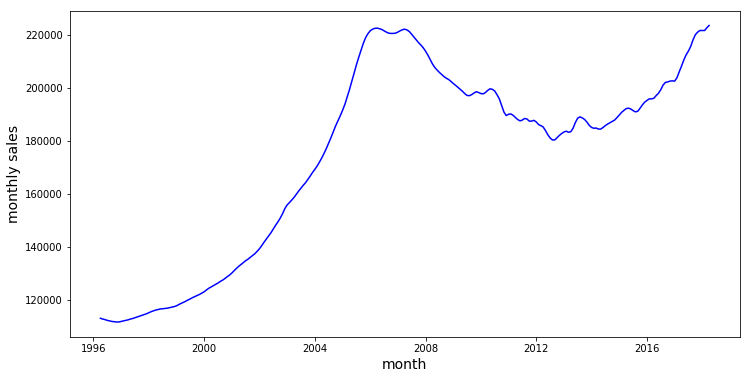

In [266]:
fig = plt.figure(figsize=(12,6))
plt.plot(agawam, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("monthly sales", fontsize=14)
plt.show()

In [269]:
data_diff = agawam.diff(periods=1)
data_diff.head(10)

,value
time,
1996-04-01,NaN
1996-05-01,-300.0
1996-06-01,-200.0
1996-07-01,-300.0
1996-08-01,-200.0
1996-09-01,-200.0
1996-10-01,-100.0
1996-11-01,-100.0
1996-12-01,0.0


In [275]:
data_diff.fillna(method='bfill', inplace=True)

In [276]:
data_diff.head()

,value
time,
1996-04-01,-300.0
1996-05-01,-300.0
1996-06-01,-200.0
1996-07-01,-300.0
1996-08-01,-200.0


In [314]:
NY_data = NY[['time','value']]

In [316]:
NY_data.set_index('time', inplace=True)

In [318]:
NY_data.sort_index(inplace=True)

/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [321]:
NY_data.head()

,value
time,
1996-04-01,209900.0
1996-04-01,134800.0
1996-04-01,176500.0
1996-04-01,214700.0
1996-04-01,66500.0


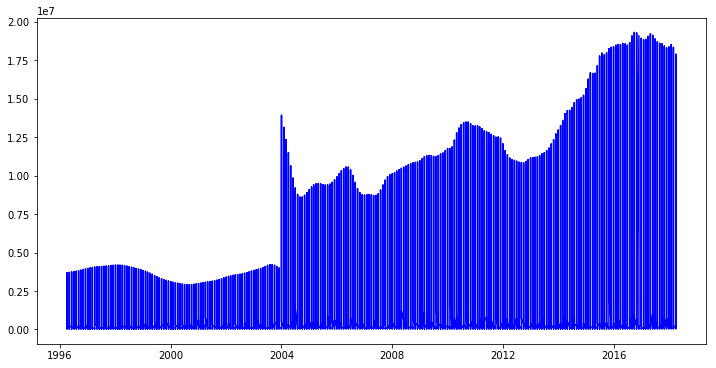

In [320]:
fig = plt.figure(figsize=(12,6))
plt.plot(NY_data, color="blue")
plt.show()

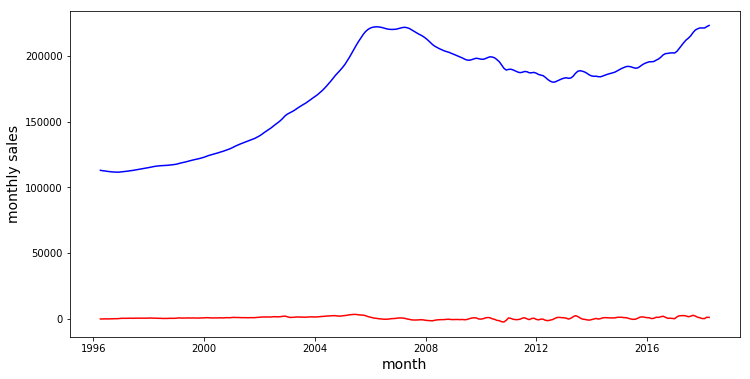

In [279]:
# rolmean = data.rolling(window = 4).mean()
# data_minus_rolmean = data - rolmean

fig = plt.figure(figsize=(12,6))
plt.plot(agawam, color="blue")
plt.plot(data_diff, color="red")
#plt.plot(data_minus_rolmean, color="yellow")

plt.xlabel("month", fontsize=14)
plt.ylabel("monthly sales", fontsize=14)
plt.show()

In [280]:
from statsmodels.tsa.stattools import adfuller

/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [284]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data_diff['value'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)



Results of Dickey-Fuller Test:
Test Statistic                  -1.967374
p-value                          0.301059
#Lags Used                      12.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


# Step 4: EDA and Visualization
Perform basic EDA as you would building any model, then create at least 3 visualizations.  At least one of the visualizations should have time on the x-axis.  Axes should be labeled and any text should be legible.

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 5: ARIMA Modeling
Be sure to validate your model.  Make a forecast for the future and describe the trend.

# Step 6: Interpreting Results
Give a detailed interpretation of results including the relationship between the inputs and output of the model.